In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np

import tensorflow as tf
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
data.columns = ['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']



In [ ]:
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
things = data.values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
### MLP regression
X = things[:, 1:14]
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, X, test_size=0.2, random_state=42)

# Set the input shape
input_shape = (13,)
print(f'Feature shape: {input_shape}')

def regularizer(x):
    q= tf.reduce_mean(x)
    p=tf.constant(0.1)
    c=tf.constant(200.1)
    return -c*p*tf.math.log(q)-c*(1-p)*tf.math.log(1-q)

input = tf.keras.Input(shape=input_shape)
encoded = Dense(80, activation='sigmoid',
                activity_regularizer=regularizer)(input)
decoded = Dense(13, activation='linear')(encoded)

autoencoder = tf.keras.Model(input, decoded)
encoder=tf.keras.Model(input,encoded)


optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
# Instantiate a loss function.
loss =tf.keras.losses.MeanSquaredError()

batch_size=20

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validat

In [ ]:
regularizer(tf.constant([1.1,2.1,3.8]))

In [ ]:
import numpy as np
def GradNorm(grads):
  w=grads[0].numpy()
  w=w.flatten()
  for i in range(1,4):
    w1=grads[i].numpy()
    w=np.append(w, w1.flatten())

  return np.linalg.norm(w)

import time
  
    
epochs = 500
trainMSE=[]
testMSE=[]
NormGrad=[]
time1=time.time()
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, X_train))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(20)
    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        


        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = autoencoder(x_batch_train, training=True)
            enc=encoder(x_batch_train)
              # Logits for this minibatch
            logits2 = autoencoder(X_test, training=False)

            # Compute the loss value for this minibatch.
            loss_value = loss(y_batch_train, logits)
            #print(loss_value.numpy())
            trainMSE.append(loss_value.numpy())
            loss_value2 = loss(X_test, logits2)
            testMSE.append(loss_value2.numpy())



        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, autoencoder.trainable_weights)
        NormGrad.append(GradNorm(grads))
        

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, autoencoder.trainable_weights))
        #Weight=model.getweights()



        # Log every 200 batches.
        if step % 5 == 0:
          print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
          print("Seen so far: %s samples" % ((step + 1) * batch_size))
    
time2=time.time()



Start of epoch 0
Training loss (for one batch) at step 0: 1.4336
Seen so far: 20 samples
Training loss (for one batch) at step 5: 1.0737
Seen so far: 120 samples

Start of epoch 1
Training loss (for one batch) at step 0: 1.1657
Seen so far: 20 samples
Training loss (for one batch) at step 5: 0.9979
Seen so far: 120 samples

Start of epoch 2
Training loss (for one batch) at step 0: 1.0344
Seen so far: 20 samples
Training loss (for one batch) at step 5: 0.8954
Seen so far: 120 samples

Start of epoch 3
Training loss (for one batch) at step 0: 0.7829
Seen so far: 20 samples
Training loss (for one batch) at step 5: 0.7486
Seen so far: 120 samples

Start of epoch 4
Training loss (for one batch) at step 0: 0.7737
Seen so far: 20 samples
Training loss (for one batch) at step 5: 0.8774
Seen so far: 120 samples

Start of epoch 5
Training loss (for one batch) at step 0: 0.6960
Seen so far: 20 samples
Training loss (for one batch) at step 5: 0.9116
Seen so far: 120 samples

Start of epoch 6
Trai

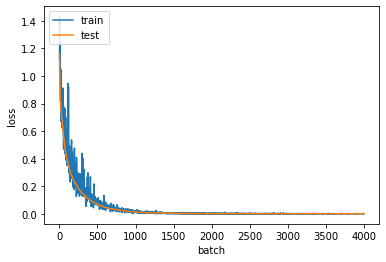

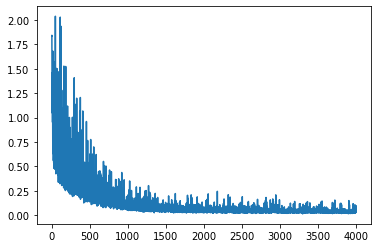

In [ ]:
plt.plot(trainMSE)
plt.plot(testMSE)
plt.ylabel('loss')
plt.xlabel('batch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(NormGrad)

(array([ 4., 12.,  8., 14.,  6.,  6., 12.,  7.,  5.,  6.]),
 array([0.1102871 , 0.18842216, 0.26655722, 0.3446923 , 0.42282733,
        0.5009624 , 0.57909745, 0.6572325 , 0.73536754, 0.8135026 ,
        0.8916377 ], dtype=float32),
 <a list of 10 Patch objects>)

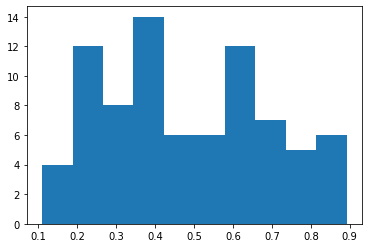

In [ ]:
encoder=enc.numpy()
encoder=encoder[0]
#plt.plot(encoder)
plt.hist(encoder)